# Imports & File Load

In [122]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
# import requests
# import json
import re
# import os
# import time
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [3]:
df = pd.read_csv("sources/judges_orig.csv")
df.head()

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1394646,3563,Abrams,Leslie,Joyce,,NaN,NaN,1974,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Marvin J. Garbis, U.S. Distric...",NaN
1,1393931,3419,Abrams,Ronnie,,,NaN,NaN,1968,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Thomas P. Griesa, U.S. Distric...",NaN
2,1376976,1,Abruzzo,Matthew,T.,,4.0,30.0,1889,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Brooklyn, New York, 1910-1936",NaN
3,1376981,2,Acheson,Marcus,Wilson,,6.0,7.0,1828,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Pittsburgh, Pennsylvania, 18...",NaN
4,1376986,3,Acker,William,Marsh,Jr.,10.0,25.0,1927,Birmingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"U.S. Army private first class, 1946-1947; Priv...",NaN


# File Investigation

In [ ]:
df.info()

In [ ]:
original_size = df.memory_usage().sum()
original_size

In [12]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 205 columns):
nid                                      int64
jid                                      int64
Last_Name                                object
First_Name                               object
Middle_Name                              object
Suffix                                   object
Birth_Month                              int32
Birth_Day                                int32
Birth_Year                               int32
Birth_City                               object
Birth_State                              object
Death_Month                              int32
Death_Day                                int32
Death_Year                               int32
Death_City                               object
Death_State                              object
Gender                                   object
Race_or_Ethnicity                        object
Court_Type_1                        

In [ ]:
# df = df.drop(columns='url')

In [ ]:
# df.profile_report()

# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 
- convert separated birth/death info to united field
- convert all string dates into datetime
- convert year-only dates into datetime

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '-')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [5]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(value=9).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(value=30).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(value=9).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(value=30).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(value=1677).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)

In [6]:
df.Death_Date.head()

0    1677-09-30
1    1677-09-30
2    1971-05-28
3    1906-06-21
4    2018-06-21
Name: Death_Date, dtype: object

In [123]:
forceDT = [
    'Birth_Date',
    'Death_Date',
    'Recess_Appointment_Date_1',
    'Nomination_Date_1',
    'Committee_Referral_Date_1',
    'Hearing_Date_1',
    'Committee_Action_Date_1',
    'Confirmation_Date_1',
    'Commission_Date_1',
    'Service_as_Chief_Judge_Begin_1',
    'Service_as_Chief_Judge_End_1',
    '2nd_Service_as_Chief_Judge_Begin_1',
    '2nd_Service_as_Chief_Judge_End_1',
    'Senior_Status_Date_1',
    'Termination_Date_1',
    'Recess_Appointment_Date_2',
    'Nomination_Date_2',
    'Committee_Referral_Date_2',
    'Hearing_Date_2',
    'Committee_Action_Date_2',
    'Confirmation_Date_2',
    'Commission_Date_2',
    'Service_as_Chief_Judge_Begin_2',
    'Service_as_Chief_Judge_End_2',
    '2nd_Service_as_Chief_Judge_Begin_2',
    '2nd_Service_as_Chief_Judge_End_2',
    'Senior_Status_Date_2',
    'Termination_Date_2',
    'Recess_Appointment_Date_3',
    'Nomination_Date_3',
    'Committee_Referral_Date_3',
    'Hearing_Date_3',
    'Committee_Action_Date_3',
    'Confirmation_Date_3',
    'Commission_Date_3',
    'Service_as_Chief_Judge_Begin_3',
    'Service_as_Chief_Judge_End_3',
    '2nd_Service_as_Chief_Judge_Begin_3',
    '2nd_Service_as_Chief_Judge_End_3',
    'Senior_Status_Date_3',
    'Termination_Date_3',
    'Recess_Appointment_Date_4',
    'Nomination_Date_4',
    'Committee_Referral_Date_4',
    'Hearing_Date_4',
    'Committee_Action_Date_4',
    'Confirmation_Date_4',
    'Commission_Date_4',
    'Service_as_Chief_Judge_Begin_4',
    'Service_as_Chief_Judge_End_4',
    '2nd_Service_as_Chief_Judge_Begin_4',
    '2nd_Service_as_Chief_Judge_End_4',
    'Senior_Status_Date_4',
    'Termination_Date_4',
    'Recess_Appointment_Date_5',
    'Nomination_Date_5',
    'Committee_Referral_Date_5',
    'Hearing_Date_5',
    'Committee_Action_Date_5',
    'Confirmation_Date_5',
    'Commission_Date_5',
    'Service_as_Chief_Judge_Begin_5',
    'Service_as_Chief_Judge_End_5',
    '2nd_Service_as_Chief_Judge_Begin_5',
    '2nd_Service_as_Chief_Judge_End_5',
    'Senior_Status_Date_5',
    'Termination_Date_5',
    'Recess_Appointment_Date_6',
    'Nomination_Date_6',
    'Committee_Referral_Date_6',
    'Hearing_Date_6',
    'Committee_Action_Date_6',
    'Confirmation_Date_6',
    'Commission_Date_6',
    'Service_as_Chief_Judge_Begin_6',
    'Service_as_Chief_Judge_End_6',
    '2nd_Service_as_Chief_Judge_Begin_6',
    '2nd_Service_as_Chief_Judge_End_6',
    'Senior_Status_Date_6',
    'Termination_Date_6'
]
df[forceDT] = df[forceDT].apply(pd.to_datetime)
df.dtypes.head(60)

nid                                            int64
jid                                            int64
Last_Name                                     object
First_Name                                    object
Middle_Name                                   object
Suffix                                        object
Birth_Month                                    int32
Birth_Day                                      int32
Birth_Year                                     int32
Birth_City                                    object
Birth_State                                   object
Death_Month                                    int32
Death_Day                                      int32
Death_Year                                     int32
Death_City                                    object
Death_State                                   object
Gender                                        object
Race_or_Ethnicity                             object
Court_Type_1                                  

In [8]:
df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

In [9]:
df['Full_Name'] = df.First_Name + ' ' + df.Middle_Name + ' ' + df.Last_Name
df.Full_Name.replace(r'\s{2,4}',' ',regex=True,inplace=True)
df.Full_Name.head()

0      Leslie Joyce Abrams
1            Ronnie Abrams
2       Matthew T. Abruzzo
3    Marcus Wilson Acheson
4      William Marsh Acker
Name: Full_Name, dtype: object

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 205 columns):
nid                                      int64
jid                                      int64
Last_Name                                object
First_Name                               object
Middle_Name                              object
Suffix                                   object
Birth_Month                              int32
Birth_Day                                int32
Birth_Year                               int32
Birth_City                               object
Birth_State                              object
Death_Month                              int32
Death_Day                                int32
Death_Year                               int32
Death_City                               object
Death_State                              object
Gender                                   object
Race_or_Ethnicity                        object
Court_Type_1                        

# Basic Research

### Most Appointments

In [18]:
df.Appointing_President_1.value_counts() #.head()

William J. Clinton       357
Ronald Reagan            347
George W. Bush           310
Barack Obama             308
Jimmy Carter             247
Richard M. Nixon         212
Franklin D. Roosevelt    186
George H.W. Bush         169
Dwight D. Eisenhower     166
Lyndon B. Johnson        160
Harry S Truman           124
John F. Kennedy          119
Donald J. Trump          114
Woodrow Wilson            74
Calvin Coolidge           73
Theodore Roosevelt        65
Herbert Hoover            56
Gerald Ford               53
William H. Taft           49
Ulysses Grant             47
Warren G. Harding         47
Grover Cleveland          41
George Washington         38
Abraham Lincoln           36
Benjamin Harrison         35
William McKinley          31
Andrew Jackson            23
James Monroe              22
Rutherford B. Hayes       21
John Adams                19
Chester A. Arthur         18
Franklin Pierce           18
Thomas Jefferson          16
James Madison             12
John Quincy Ad

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [19]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1248
Qualified                          948
Not Qualified                       17
Exceptionally Well Qualified        11
Not Qualified By Reason of Age       3
Name: ABA_Rating_1, dtype: int64

In [20]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
George W. Bush        4
Donald J. Trump       4
Jimmy Carter          3
William J. Clinton    3
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [21]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Full_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']]Professional_Career'Confirmation_Date_1', ascending=False)

,Full_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1829,Jonathan Allen Kobes,Not Qualified,Donald J. Trump,2018-12-11
1242,Charles Barnes Goodwin,Not Qualified,Donald J. Trump,2018-08-28
3261,Holly Lou Teeter,Not Qualified,Donald J. Trump,2018-08-01
1269,Leonard Steven Grasz,Not Qualified,Donald J. Trump,2017-12-12
3385,Gregory Frederick Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1609,Dora L. Irizarry,Not Qualified,George W. Bush,2004-06-24
220,Roger T. Benitez,Not Qualified,George W. Bush,2004-06-17
444,David L. Bunning,Not Qualified,George W. Bush,2002-02-14
1352,David Frank Hamilton,Not Qualified,William J. Clinton,1994-10-07
1724,David A. Katz,Not Qualified,William J. Clinton,1994-10-07


In [22]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Full_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Full_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
2487,Donald Eugene O'Brien,Not Qualified,Jimmy Carter,1978-10-04
605,Sidney Lee Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [23]:
df[df.ABA_Rating_3.str.contains("Not", na=False)][['Full_Name','ABA_Rating_3','Appointing_President_3','Confirmation_Date_3']].sort_values(by='Confirmation_Date_3', ascending=False)

,Full_Name,ABA_Rating_3,Appointing_President_3,Confirmation_Date_3


In [24]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3378
Reported (no recommendation recorded)      99
Not Referred to Committee                  84
No Committee before December 10, 1816      84
Not Reported                               15
Reported (unknown)                          9
Reported (unfavorably)                      9
Reported (without recommendation)           4
Recommended Postponement                    1
Name: Judiciary_Committee_Action_1, dtype: int64

In [25]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Full_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Full_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
1512,J[ames] Leon Holmes,Reported (without recommendation),George W. Bush,2004-07-06
2055,Daniel Anthony Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2286,Jack Richard Miller,Not Referred to Committee,Richard M. Nixon,1973-06-28
1456,John Joseph Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
2969,Collins Jacques Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
3091,Russell Evans Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1430,Frederick Jacob Reagan Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
975,George Clifton Edwards,Reported (no recommendation recorded),John F. Kennedy,1963-12-16
935,Edward Dumbauld,Not Reported,John F. Kennedy,1961-08-02
3588,Frank Wiley Wilson,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [26]:
df.Termination_1.value_counts()

Death                                       1418
Appointment to Another Judicial Position     353
Retirement                                   271
Resignation                                  235
Reassignment                                 116
Abolition of Court                            29
Recess Appointment-Not Confirmed              23
Impeachment & Conviction                       7
Name: Termination_1, dtype: int64

In [27]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['Full_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
2656,G. Thomas Porteous,Impeachment & Conviction,William J. Clinton,1994-10-07
1400,Alcee Lamar Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
612,Harry E. Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
2462,Walter Louis Nixon,Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2790,Halsted Lockwood Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1574,West Hughes Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2619,John Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [28]:
df[df.Termination_1.str.contains("Recess", na=False)][['Full_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Full_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
1431,Walter Meheula Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2703,David Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1040,John Feikens,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1960-10-13
1443,Jesse Smith Henley,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1958-10-25
1125,Monroe Mark Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
71,Maurice Neil Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
3229,Carroll O. Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
1380,Roy Winfield Harper,Recess Appointment-Not Confirmed,Harry S Truman,1947-08-07
2798,Floyd H. Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1650,George E. Q. Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03


### Demographics Breakdowns

In [29]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.836675
                                 Female    0.163325
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
None (reassignment)              Male      1.000000
Republican                       Male      0.914825
                                 Female    0.085175
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [30]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1)

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              0.843750
                                 AfriAmerican                       0.095519
                                 Hispanic                           0.040094
                                 Asian American                     0.013561
                                 AmeriIndian                        0.001769
                                 AfriAmerican/Hispanic              0.001179
                                 Asian American/Pacific Islander    0.001179
                                 Hispanic/White                     0.001179
                                 AfriAmerican/White                 0.000590
                                 Asian American/Hispanic            0.000590
                                 Asian American/White               0.000590
Federalist                       White                              1.000000
Jeffersonia

In [156]:
# Rcount = df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts()
Rcount = df.Race_or_Ethnicity.value_counts()
# sns.barplot(data=df, x='Rcount', y='Rcount', col='Party_of_Appointing_President_1', height=3)
# sns.barplot(y=Rcount.index, x=Rcount.values, col='Party_of_Appointing_President_1', height=3)
# sns.barplot(y=Rcount.index, x=Rcount.values, col='Party_of_Appointing_President_1', height=3)
sns.barplot(data=df, x='Rcount', y='Rcount', col='Party_of_Appointing_President_1', height=3)

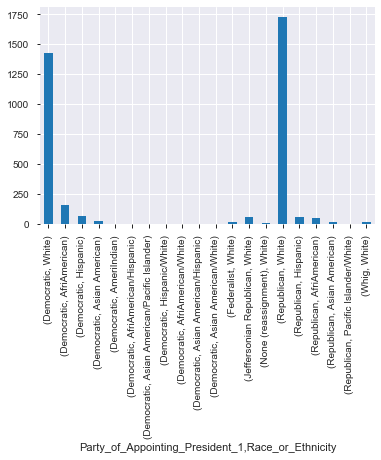

In [160]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts().plot(kind='bar')

### Declined & Rejected Appointments

In [31]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Declined", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
307,Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1954-07-21
1652,Johnson,"Nominated to U.S. Customs Court, March 29, 194...",Harry S Truman,1947-06-23
41,Allred,Received recess appointment to U.S. District C...,Franklin D. Roosevelt,1939-02-16
1160,Garrett,Received recess appointment to U.S. District C...,Calvin Coolidge,1929-02-18
2138,McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
2467,Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
829,Day,Received recess appointment to U.S. District C...,William McKinley,1899-02-28
864,Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
3609,Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
1980,Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17


In [32]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("(?i)Rejected", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
3536,White,Nominated to U.S. District Court for the Easte...,Barack Obama,2014-07-16
308,Bork,Nominated to Supreme Court of the United State...,Ronald Reagan,1982-02-08
539,Carswell,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1958-03-31
1418,Haynsworth,Nominated to Supreme Court of the United State...,Dwight D. Eisenhower,1957-04-04
2555,Parker,Nominated to Supreme Court of the United State...,Calvin Coolidge,1925-12-14
3355,Turner,Nominated to U.S. District Court for the North...,Rutherford B. Hayes,1880-12-20
2878,Rutledge,Nominated to be Chief Justice of the Supreme C...,George Washington,1789-09-26
71,Andrews,Nominated to U.S. District Court for the North...,Harry S Truman,NaT
2136,McCamant,Nominated to U.S. Court of Appeals for the Nin...,Calvin Coolidge,NaT
2798,Roberts,Nominated to U.S. District Court for the Weste...,Franklin D. Roosevelt,NaT


In [33]:
df['Other_Nomination'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(nominated.*\d\d\d\d); .*", flags = re.I).dropna(0)
df['Other_Rejection'] = df["Other_Nominations-Recess_Appointments"].str.findall(r"\b(rejected.*\d\d\d\d).*", flags = re.I).dropna(0)
df[df['Other_Nominations-Recess_Appointments'].str.contains(r"rejected", na=False, flags = re.I)][['Full_Name','Other_Nomination','Other_Rejection','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)


,Full_Name,Other_Nomination,Other_Rejection,Appointing_President_1,Confirmation_Date_1
3536,Ronnie Lee White,[Nominated to U.S. District Court for the East...,"[rejected by Senate, October 5, 1999; Nominate...",Barack Obama,2014-07-16
308,Robert Heron Bork,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, October 23, 1987]",Ronald Reagan,1982-02-08
539,George Harrold Carswell,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, April 8, 1970]",Dwight D. Eisenhower,1958-03-31
1418,Clement Furman Haynsworth,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, November 21, 1969]",Dwight D. Eisenhower,1957-04-04
2555,John Johnston Parker,[Nominated to Supreme Court of the United Stat...,"[rejected by Senate, May 7, 1930]",Calvin Coolidge,1925-12-14
3355,Ezekiel B. Turner,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, April 2, 1879]",Rutherford B. Hayes,1880-12-20
2878,John Rutledge,[Nominated to be Chief Justice of the Supreme ...,"[rejected by Senate, December 15, 1795; resign...",George Washington,1789-09-26
71,Maurice Neil Andrews,[Nominated to U.S. District Court for the Nort...,"[rejected by Senate, August 9, 1950; resigned,...",Harry S Truman,NaT
2136,Wallace McCamant,[Nominated to U.S. Court of Appeals for the Ni...,"[rejected by Senate, March 17, 1926; resigned,...",Calvin Coolidge,NaT
2798,Floyd H. Roberts,[Nominated to U.S. District Court for the West...,"[rejected by Senate, February 6, 1939; resigne...",Franklin D. Roosevelt,NaT


In [34]:
# df.apply(lambda x: x.str.contains(r"declined").any()).idxmax()
# df.apply(lambda x: x.str.startswith(r"Nominated").any()).idxmax()

In [35]:
df.loc[df.Party_of_Reappointing_President_1 != df.Party_of_Appointing_President_1][['Full_Name','Appointing_President_1','Reappointing_President_1','Recess_Appointment_Date_1','Nomination_Date_1','Confirmation_Date_1']].dropna().sort_values(by='Confirmation_Date_1', ascending=False)

,Full_Name,Appointing_President_1,Reappointing_President_1,Recess_Appointment_Date_1,Nomination_Date_1,Confirmation_Date_1
1287,Roger L. Gregory,William J. Clinton,George W. Bush,2000-12-27,2001-05-09,2001-07-20


### Professional Background

In [ ]:
df.Professional_Career.head()

In [38]:
df.Professional_Career = df.Professional_Career.astype(str)
# Counter(" ".join(df.Professional_Career).lower().split()).most_common(60)
pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(60)

of                 6835
private            4501
practice,          4463
u.s.               4128
district           2333
the                1967
attorney,          1937
assistant          1840
new                1830
judge,             1538
court              1476
state              1341
court,             1319
law                1275
judicial           1165
attorney            997
county,             964
clerk,              939
and                 846
for                 835
hon.                811
member,             778
county              772
california,         750
justice,            694
united              671
law,                651
counsel,            633
states,             615
circuit,            590
york,               590
general,            588
army                587
university          580
pennsylvania,       560
department          520
york                516
supreme             510
city,               497
deputy              491
texas,              491
washington,     

In [143]:
df[df.Professional_Career.str.contains('army|navy|marine|force', na=False, flags = re.I)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
Ronald Reagan            174
Jimmy Carter             153
Richard M. Nixon         144
Lyndon B. Johnson         93
George H.W. Bush          66
William J. Clinton        61
Dwight D. Eisenhower      58
Franklin D. Roosevelt     58
John F. Kennedy           53
George W. Bush            52
Gerald Ford               40
Harry S Truman            40
Barack Obama              27
Grover Cleveland          19
Calvin Coolidge           18
dtype: int64

In [144]:
df[df.Professional_Career.str.contains('professor', na=False, flags = re.I)].groupby(by='Appointing_President_1').size().sort_values(ascending=False).head(15)

Appointing_President_1
William J. Clinton       75
George W. Bush           60
Ronald Reagan            49
Jimmy Carter             44
Barack Obama             27
Donald J. Trump          24
Franklin D. Roosevelt    19
George H.W. Bush         17
Lyndon B. Johnson        15
Richard M. Nixon         13
Theodore Roosevelt        9
Dwight D. Eisenhower      9
Harry S Truman            8
Woodrow Wilson            7
Ulysses Grant             6
dtype: int64

In [60]:
###   BIGRAMS / NGRAMS  ???

# df['Prof_Repeats'] = df.Professional_Career.str.findall(r"(?=(\b\w+\W+\w+\W+\w+))",flags=re.I).dropna(0)
# df.Prof_Repeats.head()
# # pd.Series(' '.join(df.Prof_Repeats).lower().split()).value_counts().head(60)
# # Counter(" ".join(df.Prof_Repeats).lower().split()).most_common(60)

# bigrams = []
# for idx, row in df.iterrows():
#     lst = row.Professional_Career.split(' ')
#     bigrams.append([(lst[x].strip(), lst[x+1].strip()) for x in range(len(lst)-1)])
# print(bigrams)


# def bigram(row):
#     lst = row['Professional_Career'].split(' ')
#     return [(lst[x].strip(), lst[x+1].strip()) for x in range(len(lst)-1)]
# bigrams = df.apply(lambda row: bigram(row), axis=1)
# print(bigrams.tolist())

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
private practice,4472
court of,1414
district of,1387
new york,1152
of the,1031
assistant attorney,939
law clerk,864
clerk hon,775
united states,658
the united,656


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,4), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df.Professional_Career)
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).head(20)

,frequency
law clerk hon,773
the united states,650
of the united,649
of the united states,647
conference of the,435
conference of the united,435
judicial conference of the,432
judicial conference of,432
court of appeals,390
private practice new,389


### Education

In [40]:
lastreadlaw = [df[df['School_1'] == 'Read law'].Degree_Year_1.max(),
               df[df['School_2'] == 'Read law'].Degree_Year_3.max(), 
               df[df['School_3'] == 'Read law'].Degree_Year_3.max(),
               df[df['School_4'] == 'Read law'].Degree_Year_4.max(), 
               df[df['School_5'] == 'Read law'].Degree_Year_5.max()
              ]
lastreadlaw

[Timestamp('1934-01-01 00:00:00'),
 Timestamp('1925-01-01 00:00:00'),
 Timestamp('1930-01-01 00:00:00'),
 Timestamp('1927-01-01 00:00:00'),
 Timestamp('1910-01-01 00:00:00')]

In [41]:
allschool_df = df[['Full_Name','Appointing_President_1','Party_of_Appointing_President_1']]
allschool_df['Schl1'] = df.School_1 + '-777777777-' + df.Degree_1.fillna('nun') + '-999999999-' + df.Degree_Year_1.astype(str).fillna('nun')
allschool_df['Schl2'] = df.School_2 + '-777777777-' + df.Degree_2.fillna('nun') + '-999999999-' + df.Degree_Year_2.astype(str).fillna('nun')
allschool_df['Schl3'] = df.School_3 + '-777777777-' + df.Degree_3.fillna('nun') + '-999999999-' + df.Degree_Year_3.astype(str).fillna('nun')
allschool_df['Schl4'] = df.School_4 + '-777777777-' + df.Degree_4.fillna('nun') + '-999999999-' + df.Degree_Year_4.astype(str).fillna('nun')
allschool_df['Schl5'] = df.School_5 + '-777777777-' + df.Degree_5.fillna('nun') + '-999999999-' + df.Degree_Year_5.astype(str).fillna('nun')
allschool_df

C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Full_Name,Appointing_President_1,Party_of_Appointing_President_1,Schl1,Schl2,Schl3,Schl4,Schl5
0,Leslie Joyce Abrams,Barack Obama,Democratic,Brown University-777777777-B.A.-999999999-1997...,Yale Law School-777777777-J.D.-999999999-2002-...,NaN,NaN,NaN
1,Ronnie Abrams,Barack Obama,Democratic,Cornell University-777777777-B.A.-999999999-19...,Yale Law School-777777777-J.D.-999999999-1993-...,NaN,NaN,NaN
2,Matthew T. Abruzzo,Franklin D. Roosevelt,Democratic,Brooklyn Law School-777777777-LL.B.-999999999-...,NaN,NaN,NaN,NaN
3,Marcus Wilson Acheson,Rutherford B. Hayes,Republican,Washington College (now Washington and Jeffers...,Read law-777777777-nun-999999999-1852-01-01,NaN,NaN,NaN
4,William Marsh Acker,Ronald Reagan,Republican,Birmingham-Southern College-777777777-B.A.-999...,Yale Law School-777777777-LL.B.-999999999-1952...,NaN,NaN,NaN
5,Harold Arnold Ackerman,Jimmy Carter,Democratic,Rutgers School of Law -- Newark-777777777-LL.B...,NaN,NaN,NaN,NaN
6,James Waldo Ackerman,Gerald Ford,Republican,Marquette University-777777777-B.S.-999999999-...,Marquette University Law School-777777777-J.D....,NaN,NaN,NaN
7,Raymond L. Acosta,Ronald Reagan,Republican,Rutgers School of Law -- Newark-777777777-J.D....,NaN,NaN,NaN,NaN
8,J[ackson] Leroy Adair,Franklin D. Roosevelt,Democratic,University of Michigan Law School-777777777-LL...,NaN,NaN,NaN,NaN
9,Arlin Marvin Adams,Richard M. Nixon,Republican,Temple University-777777777-B.S.-999999999-194...,University of Pennsylvania Law School-77777777...,Temple University-777777777-M.A.-999999999-195...,NaN,NaN


In [42]:
allschool_df = allschool_df.melt(id_vars =['Full_Name','Appointing_President_1','Party_of_Appointing_President_1'], value_vars =['Schl1','Schl2','Schl3','Schl4','Schl5'], var_name='Degree_Number', value_name='School')

In [43]:
allschool_df.Degree_Number.replace(r'Schl',r'',regex=True,inplace=True)
allschool_df['Degree'] = allschool_df.School.str.extract('-777777777-(.*)-999999999-', expand=False)
allschool_df['Degree_Year'] = allschool_df.School.str.extract('.*-999999999-(.*)$', expand=False)
allschool_df['School'] = allschool_df.School.str.extract(r'(.*)-777777777-.*', expand=False)
allschool_df['DYear'] = allschool_df.Degree_Year.str.extract('^(\d\d\d\d).*', expand=False)
allschool_df.replace('nun',np.nan,inplace=True)
allschool_df.Degree_Year = allschool_df.Degree_Year.astype('datetime64[ns]') 

In [44]:
allschool_df.head(15)

,Full_Name,Appointing_President_1,Party_of_Appointing_President_1,Degree_Number,School,Degree,Degree_Year,DYear
0,Leslie Joyce Abrams,Barack Obama,Democratic,1,Brown University,B.A.,1997-01-01,1997
1,Ronnie Abrams,Barack Obama,Democratic,1,Cornell University,B.A.,1990-01-01,1990
2,Matthew T. Abruzzo,Franklin D. Roosevelt,Democratic,1,Brooklyn Law School,LL.B.,1910-01-01,1910
3,Marcus Wilson Acheson,Rutherford B. Hayes,Republican,1,Washington College (now Washington and Jeffers...,B.A.,1845-01-01,1845
4,William Marsh Acker,Ronald Reagan,Republican,1,Birmingham-Southern College,B.A.,1949-01-01,1949
5,Harold Arnold Ackerman,Jimmy Carter,Democratic,1,Rutgers School of Law -- Newark,LL.B.,1951-01-01,1951
6,James Waldo Ackerman,Gerald Ford,Republican,1,Marquette University,B.S.,1947-01-01,1947
7,Raymond L. Acosta,Ronald Reagan,Republican,1,Rutgers School of Law -- Newark,J.D.,1951-01-01,1951
8,J[ackson] Leroy Adair,Franklin D. Roosevelt,Democratic,1,University of Michigan Law School,LL.B.,1911-01-01,1911
9,Arlin Marvin Adams,Richard M. Nixon,Republican,1,Temple University,B.S.,1941-01-01,1941


In [45]:
allschool_df['School_Neat'] = allschool_df['School']
allschool_df.School_Neat.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschool_df.replace({'School_Neat':{
    'College of':'Cof',
    ' College':'',
    'University of':'Uof',
    ' University':'',
    ' Department':'',
    ' Faculty':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ' of Jurisprudence':'',
    ' of Business':'',
    ' Business':'',
    ' Administration':'',
    ' Wharton':'',
    ' Gould':'',
    ', Boalt Hall':'',
    ', Paul M. Hebert':'',
    '-Kansas City':'',
    ' -- Newark':'',
    ' -- Camden':'',
    '  ':' '
}},regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?Cof','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r'\s?$','',regex=True,inplace=True)
allschool_df.School_Neat.replace(r',$','',regex=True,inplace=True)
allschool_df.School_Neat.value_counts().head(60)

Read law                       538
Harvard                        504
Yale                           288
Uof Michigan                   187
Uof Virginia                   174
Columbia                       170
Uof Texas                      153
Georgetown                     142
Uof Pennsylvania               123
Princeton                      105
Stanford                       102
New York                        94
Uof California, Berkeley        92
Uof Florida                     79
George Washington               77
Uof Chicago                     74
Cornell                         67
Uof Alabama                     65
Louisiana State                 63
Northwestern                    61
Uof Missouri                    60
Uof Oklahoma                    57
Uof Georgia                     55
Rutgers                         54
Uof Iowa                        53
Duke                            52
Uof North Carolina              52
Vanderbilt                      52
Uof South Carolina  

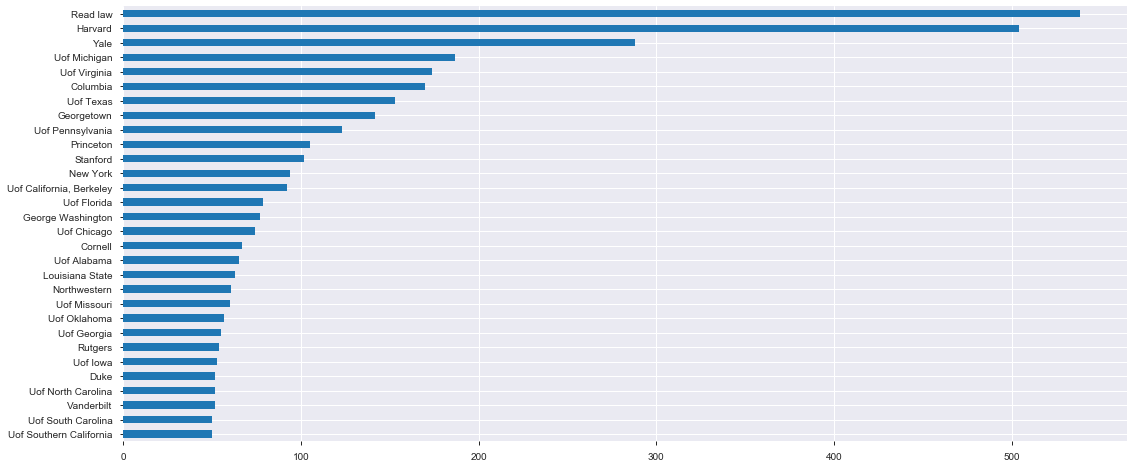

In [46]:
allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()

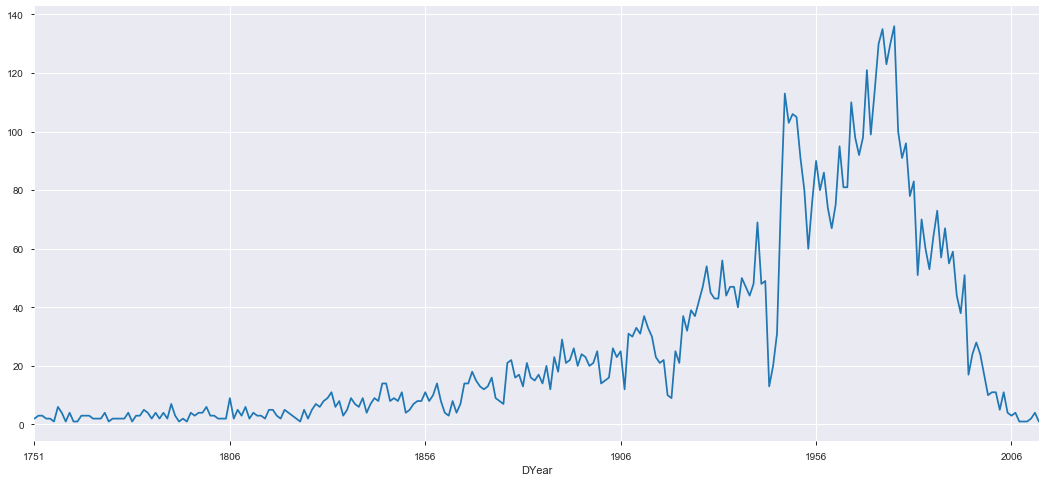

In [72]:
allschool_df.groupby(['DYear']).School_Neat.count().plot(figsize=(18, 8))


# allschool_df.School_Neat.value_counts().head(30).plot(kind='barh', figsize=(18, 8), y='School_Neat').invert_yaxis()
# allschool_df.School_Neat.value_counts().head(30).groupby(by='DYear').plot(kind='barh', figsize=(18, 8)).invert_yaxis()

# allschool_df.plot(x='DYear', y='School_Neat', figsize=(18, 5), lw=0.5)
# allschool_df.groupby(by='DYear').School_Neat.value_counts(1)

In [ ]:
allschool_df.groupby(by='Party_of_Appointing_President_1').School_Neat.value_counts(1)

In [114]:
allschool_df.Degree.value_counts().head(20)

J.D.        1691
B.A.        1389
LL.B.       1353
A.B.         777
B.S.         423
LL.M.        139
M.A.         126
A.M.          59
B.B.A.        57
A.A.          46
Ph.B.         33
M.S.          17
M.B.A.        16
Ph.D.         14
B.S.B.A.      10
M.P.A.         9
B.L.           8
B.S.L.         7
S.J.D.         7
B.S.E.         6
Name: Degree, dtype: int64

In [ ]:
allschool_df['Degree_Neat'] = allschool_df['Degree']
# allschool_df.School_Neat.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
# allschool_df.replace({'School_Neat':{
#     'College of':'Cof',
#     ' College':'',
#     'University of':'Uof',
#     ' University':'',
#     ' Department':'',
#     ' Faculty':'',
#     ' School':'',
#     ' Center':'',
#     ' of Law':'',
#     ' Law':'',
#     ' of Jurisprudence':'',
#     ' of Business':'',
#     ' Business':'',
#     ' Administration':'',
#     ' Wharton':'',
#     ' Gould':'',
#     ', Boalt Hall':'',
#     ', Paul M. Hebert':'',
#     '-Kansas City':'',
#     ' -- Newark':'',
#     ' -- Camden':'',
#     '  ':' '
# }},regex=True,inplace=True)
# allschool_df.School_Neat.replace(r'\s?Cof','',regex=True,inplace=True)
# allschool_df.School_Neat.replace(r'\s?$','',regex=True,inplace=True)
# allschool_df.School_Neat.replace(r',$','',regex=True,inplace=True)
# allschool_df.School_Neat.value_counts().head(60)

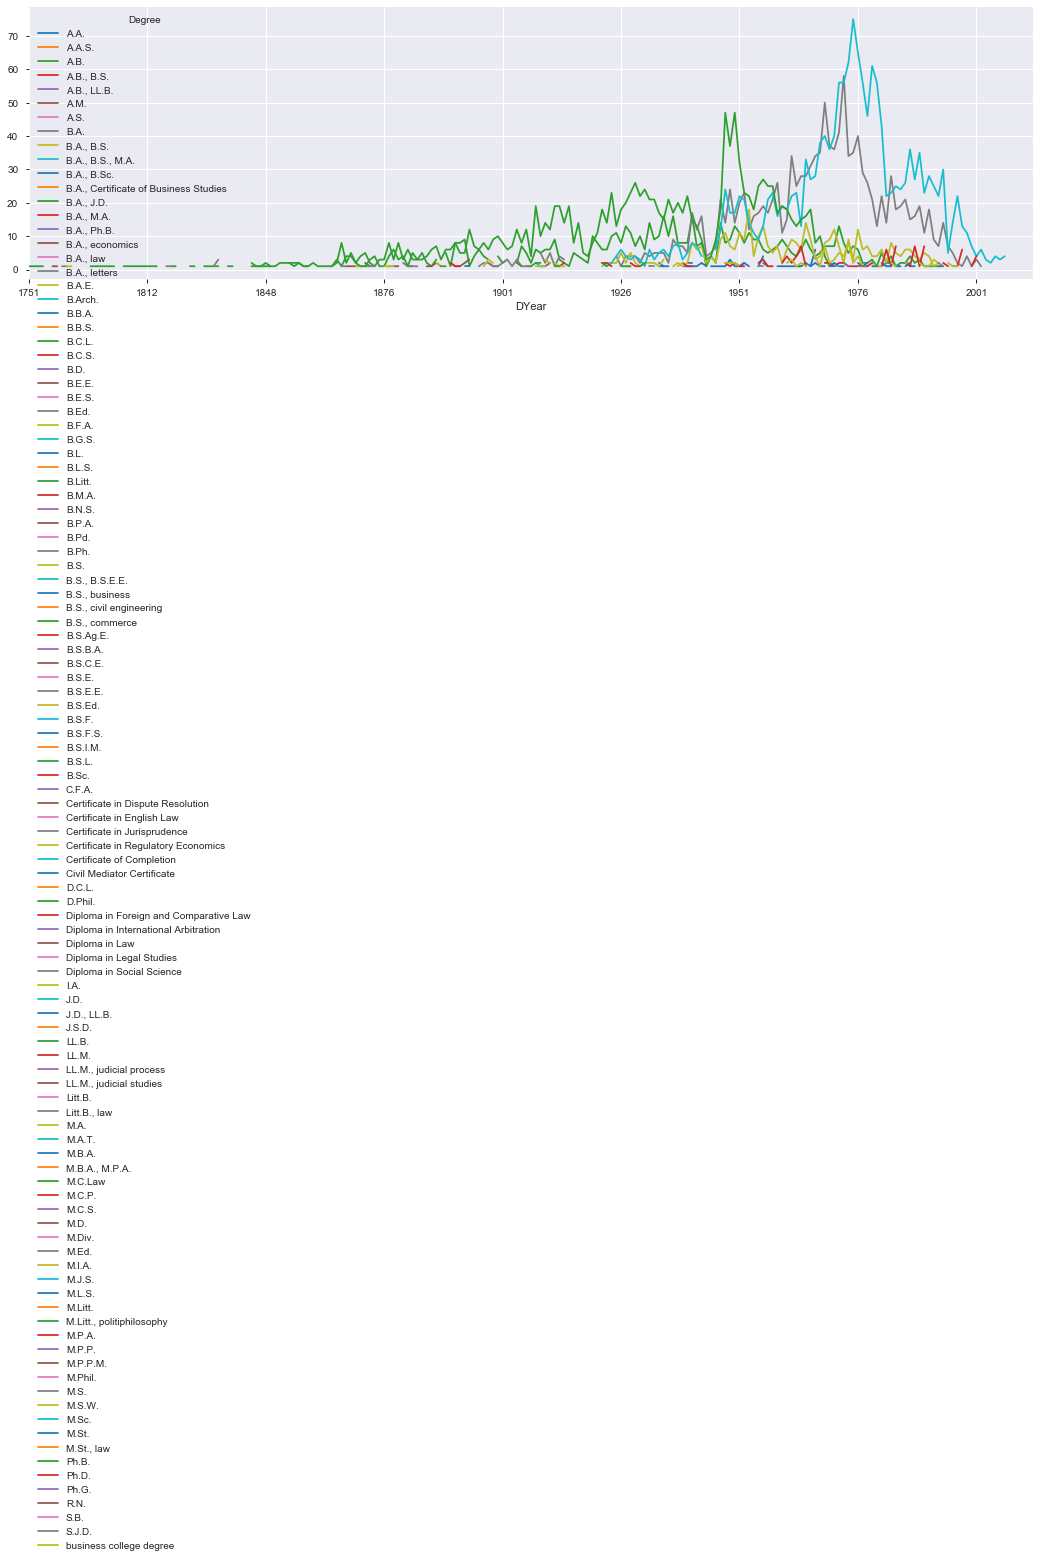

In [105]:
allschool_df.groupby(by='DYear').Degree.value_counts().unstack().plot(figsize=(18, 5), kind='line')

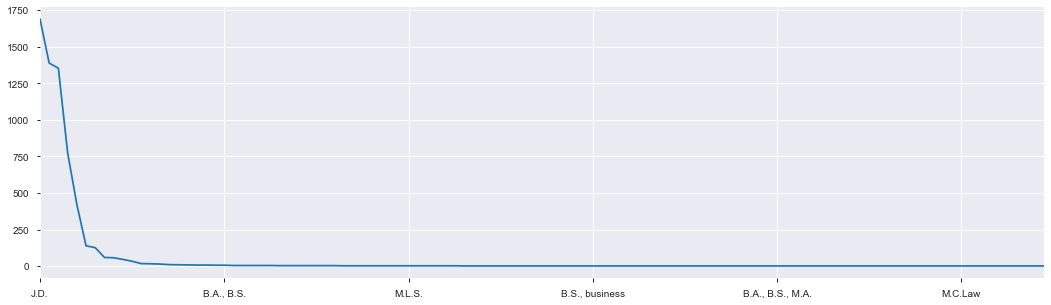

In [94]:
allschool_df.Degree.value_counts().plot(figsize=(18, 5), kind='line', x='DYear', y='Degree')


In [99]:
allschool_df[['Degree', 'DYear']]
# value_counts().plot(figsize=(18, 5), kind='line', x='DYear', y='Degree')

,Degree,DYear
0,B.A.,1997
1,B.A.,1990
2,LL.B.,1910
3,B.A.,1845
4,B.A.,1949
5,LL.B.,1951
6,B.S.,1947
7,J.D.,1951
8,LL.B.,1911
9,B.S.,1941


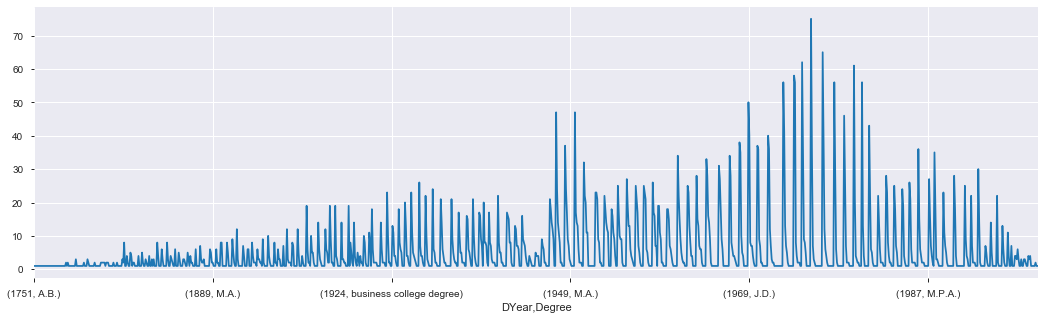

In [77]:
allschool_df.groupby(by='DYear').Degree.value_counts().plot(figsize=(18, 5))
# allschool_df.groupby(by='DYear').Degree.count().plot(figsize=(18, 5))
# allschool_df.groupby(['DYear','Degree']).count().unstack().plot.line(x='DYear', y='Degree', figsize=(18, 5), lw=0.5)

# allschool_df.Degree.value_counts().plot.line(x='Degree', y='DYear', figsize=(18, 5), lw=0.5)
# allschool_df.groupby(by='DYear').School_Neat.value_counts(1)

In [ ]:
allschool_df.to_csv('allschool.csv', index=False)

In [ ]:
df[df['School_1'].isin(['Harvard University', 'Yale University', 'Brown University', 'Columbia University', 'Princeton University'])]

# Confirmation Dates

In [73]:
df['Confirmation_Duration_Total'] = df.Confirmation_Date_1 - df.Nomination_Date_1
df.Confirmation_Duration_Total.sort_values(ascending=False).describe()

count                       3660
mean     70 days 07:27:44.262295
std      79 days 05:03:19.772641
min              0 days 00:00:00
25%             14 days 00:00:00
50%             41 days 00:00:00
75%            103 days 06:00:00
max            639 days 00:00:00
Name: Confirmation_Duration_Total, dtype: object

In [116]:
df.groupby(by='Appointing_President_1').Confirmation_Duration_Total.max().sort_values(ascending=False)

Appointing_President_1
William J. Clinton      639 days
Ronald Reagan           540 days
Jimmy Carter            539 days
George W. Bush          524 days
Barack Obama            460 days
Donald J. Trump         355 days
George H.W. Bush        317 days
Gerald Ford             317 days
Dwight D. Eisenhower    254 days
John F. Kennedy         248 days
Zachary Taylor          224 days
Lyndon B. Johnson       216 days
Harry S Truman          195 days
Richard M. Nixon        194 days
Theodore Roosevelt      169 days
Franklin D. Roosevelt   133 days
Woodrow Wilson          125 days
Benjamin Harrison       117 days
John Quincy Adams       108 days
Andrew Jackson          105 days
Herbert Hoover           99 days
Ulysses Grant            98 days
James K. Polk            95 days
Abraham Lincoln          92 days
Grover Cleveland         81 days
William McKinley         64 days
James A. Garfield        60 days
Calvin Coolidge          52 days
William H. Taft          50 days
Warren G. Harding   

In [75]:
df[(df.Appointing_President_1.str.contains('Barack')) & (df.Termination_Date_1 < '20160115')][['Full_Name','Court_Type_1','Confirmation_Date_1','Termination_1','Termination_Date_1','Court_Type_2']].sort_values(by=['Confirmation_Date_1','Termination_Date_1'],ascending=[0,1])

,Full_Name,Court_Type_1,Confirmation_Date_1,Termination_1,Termination_Date_1,Court_Type_2
2761,Luis Felipe Restrepo,U.S. District Court,2013-06-17,Appointment to Another Judicial Position,2016-01-13,U.S. Court of Appeals
2839,Robin Stacie Rosenbaum,U.S. District Court,2012-06-26,Appointment to Another Judicial Position,2014-06-03,U.S. Court of Appeals
723,Gregg Jeffrey Costa,U.S. District Court,2012-04-26,Appointment to Another Judicial Position,2014-06-02,U.S. Court of Appeals
3557,Robert Leon Wilkins,U.S. District Court,2010-12-22,Appointment to Another Judicial Position,2014-01-24,U.S. Court of Appeals
2445,Jacqueline Hong-Ngoc Nguyen,U.S. District Court,2009-12-01,Appointment to Another Judicial Position,2012-05-15,U.S. Court of Appeals
